# Nanofluid Density Prediction


## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d ai4a-lab/nanofluid-density-prediction

Dataset URL: https://www.kaggle.com/datasets/ai4a-lab/nanofluid-density-prediction
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/4.48k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.48k/4.48k [00:00<00:00, 12.1MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Nanofluid Density Prediction/nanofluid-density-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Nanofluid Density Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Density_Prediction_Dataset.csv')

In [5]:
df.head()

,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


In [6]:
df.shape

(436, 10)

In [7]:
df.size

4360

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Nano Particle                     436 non-null    object 
 1   Base Fluid                        436 non-null    object 
 2   Temperature (°C)                  436 non-null    int64  
 3   Volume Concentration (ϕ)          436 non-null    float64
 4   Density of Nano Particle 1 (ρnp)  436 non-null    int64  
 5   Density of Nano Particle 2 (ρnp)  436 non-null    int64  
 6   Density of Base Fluid (ρbf)       436 non-null    float64
 7   Volume Mixture of Particle 1      436 non-null    int64  
 8   Volume Mixture of Particle 2      436 non-null    int64  
 9   Density (ρ)                       436 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 34.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (°C),436.0,39.701835,12.444935,16.00,30.000000,40.000000,50.000000,70.000
Volume Concentration (ϕ),436.0,0.594828,0.641171,0.00,0.100000,0.300000,1.000000,2.000
Density of Nano Particle 1 (ρnp),436.0,5380.229358,1858.166923,3100.00,4320.000000,4320.000000,5810.000000,10490.000
Density of Nano Particle 2 (ρnp),436.0,2470.642202,895.044108,1910.00,2100.000000,2100.000000,2220.000000,5810.000
Density of Base Fluid (ρbf),436.0,998.243922,17.723083,977.60,990.220000,994.080000,997.130000,1063.000
Volume Mixture of Particle 1,436.0,57.522936,28.018663,17.00,20.000000,80.000000,80.000000,80.000
Volume Mixture of Particle 2,436.0,42.477064,28.018663,20.00,20.000000,20.000000,80.000000,83.000
Density (ρ),436.0,1016.367329,22.694970,983.01,998.687325,1010.319085,1028.173007,1093.432


In [10]:
df.isnull().sum()

Nano Particle                       0
Base Fluid                          0
Temperature (°C)                    0
Volume Concentration (ϕ)            0
Density of Nano Particle 1 (ρnp)    0
Density of Nano Particle 2 (ρnp)    0
Density of Base Fluid (ρbf)         0
Volume Mixture of Particle 1        0
Volume Mixture of Particle 2        0
Density (ρ)                         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Nano Particle                        14
Base Fluid                            4
Temperature (°C)                     18
Volume Concentration (ϕ)             23
Density of Nano Particle 1 (ρnp)     10
Density of Nano Particle 2 (ρnp)      6
Density of Base Fluid (ρbf)          30
Volume Mixture of Particle 1          6
Volume Mixture of Particle 2          6
Density (ρ)                         413
dtype: int64

## Data Visualization

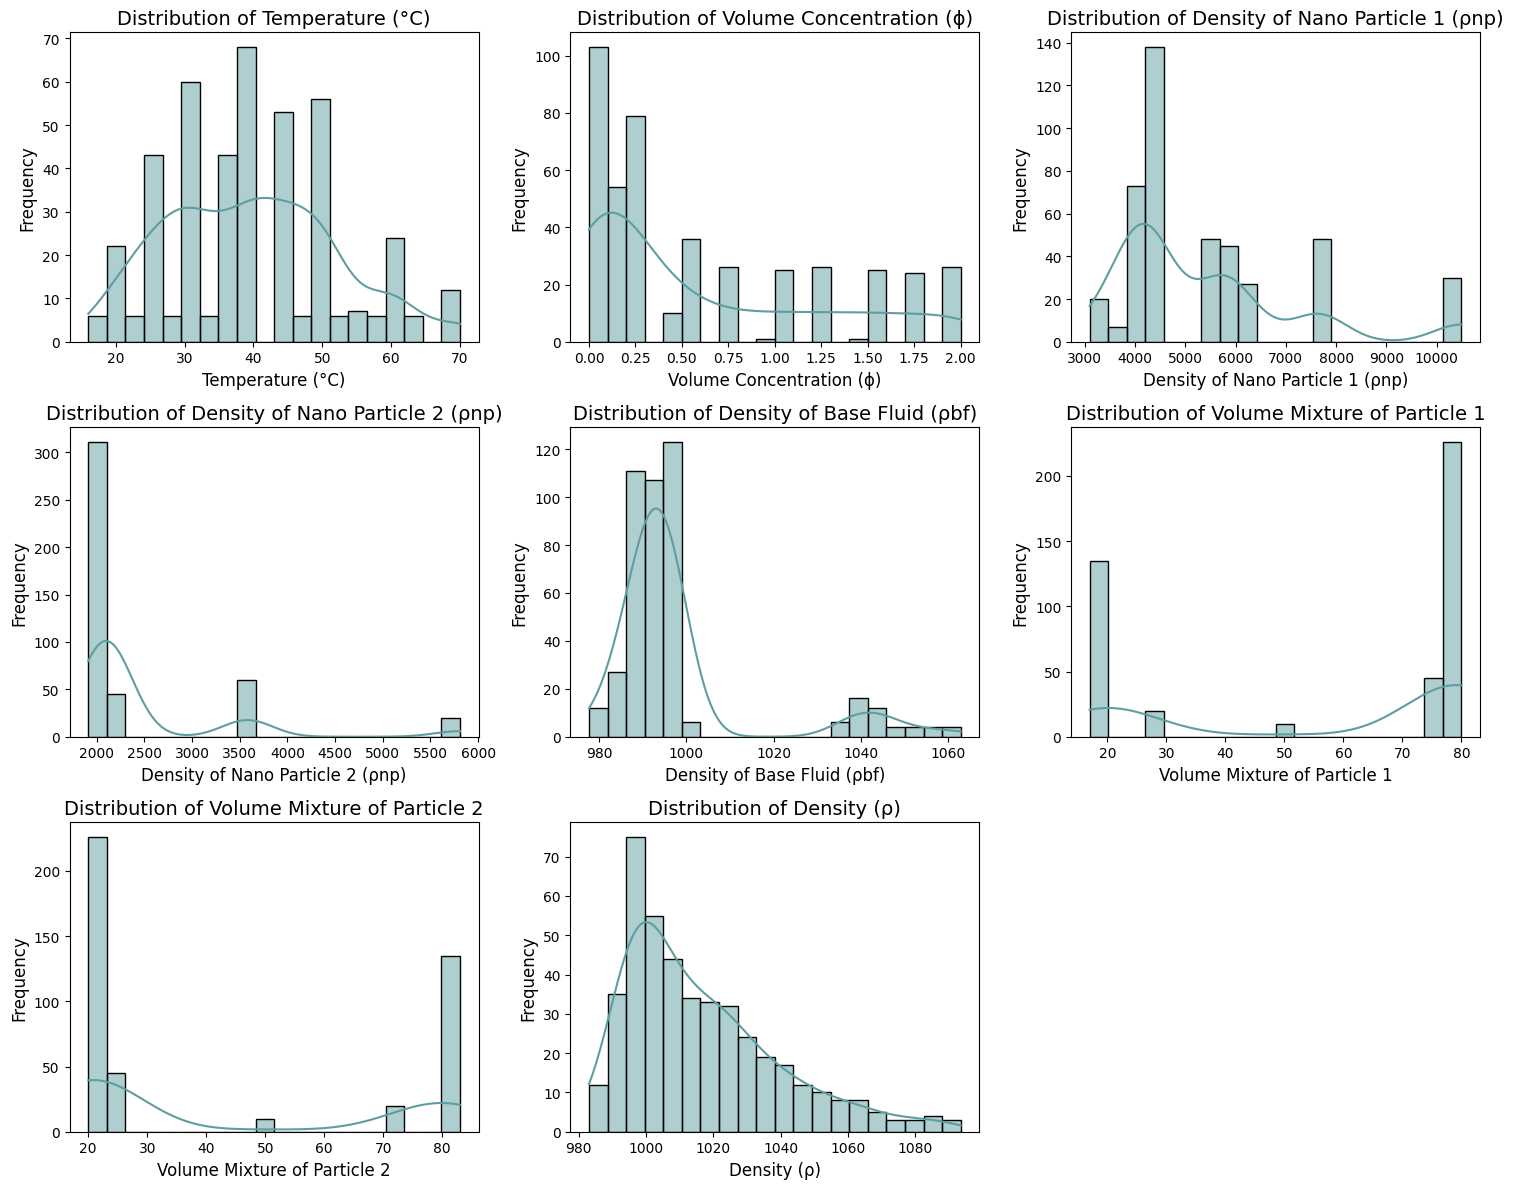

In [13]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

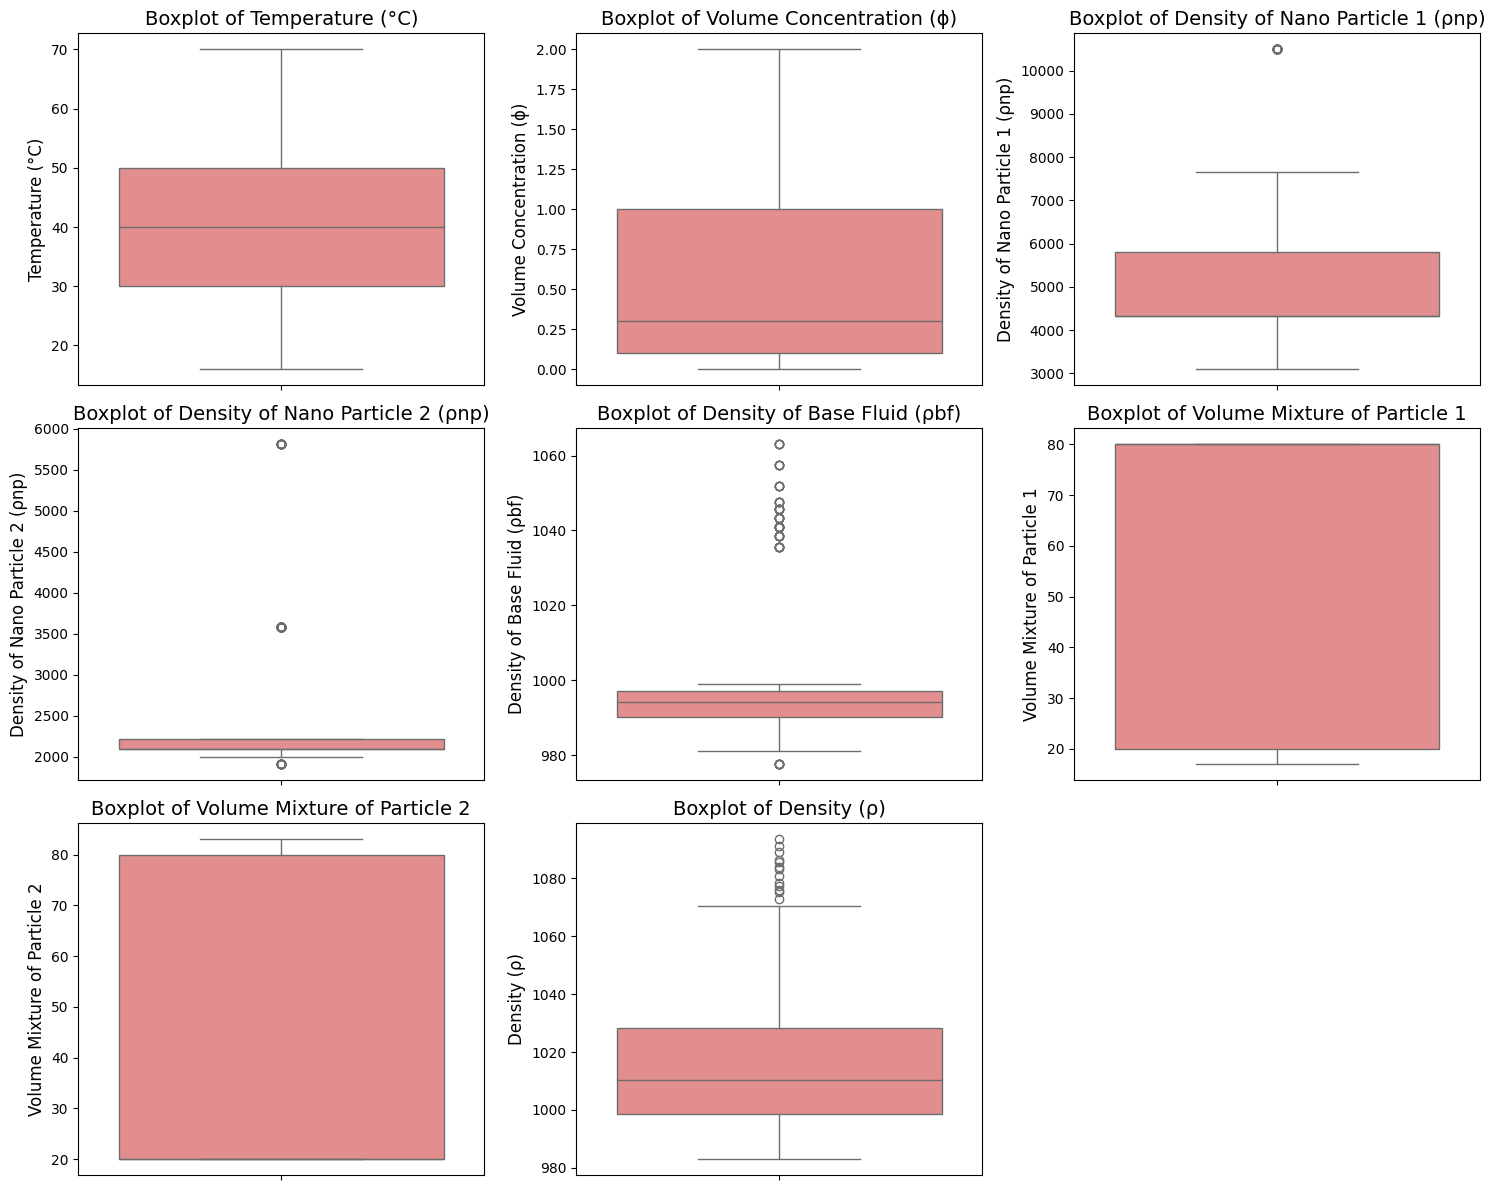

In [14]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

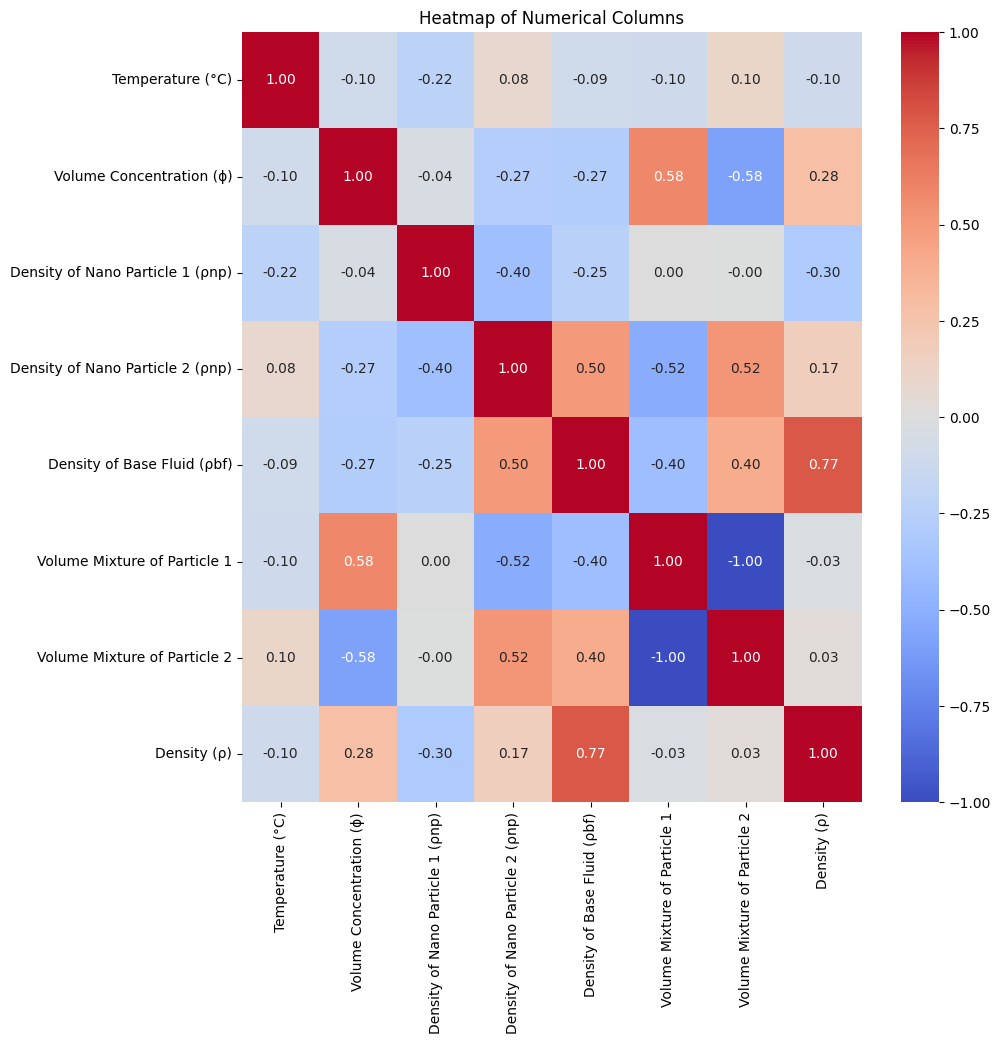

In [15]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [16]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [17]:
X = df.drop(['Density (ρ)'], axis=1)
y = df['Density (ρ)']

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [19]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [20]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [21]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.8835656832741315,
 0.9847241640090942,
 0.9726873910982071,
 0.904874059477127,
 0.9741833301707684,
 0.9681097558292647,
 0.9534470159393003,
 0.2503074485168181,
 0.9550057470160397]